Unit_6_Python_APIs
Melissa Morgan


# WeatherPy

----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for get requests
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create settings dictionary with information we're interested in
params = {"units": "imperial", "appid": api_key}

# Loop through the cities and perform request
counter = 0
for city in cities:
    params['q'] = city
    if counter == 5:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>


In [4]:
# Create DataFrame 
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
# Create loop
record_count = 1

for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        record_count = 1
    try:
        response = requests.get(base_url, params = params).json()
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
        print(f"Processing Record {record_count} | {city}")
    
    except:
        print(f"City not found. Skipping...") 
    record_count += 1

# Print out when data retrieval completed                 
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data_csv = weather_data.to_csv(r"C:\Users\Melissa Morgan\Documents\SMU\SMU_Homework\Unit_06_Python_APIs\weather_data.csv", index = None, encoding="utf-8", header=True)

In [9]:
#### Display the DataFrame
data_df.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tigil,100,RU,1570044291,95,57.8,158.67,41.78,12.21
1,ushuaia,75,AR,1570044291,75,-54.81,-68.31,46.4,26.4
2,talcahuano,20,CL,1570044292,62,-36.72,-73.12,55.4,13.87
3,namibe,50,AO,1570044292,84,-15.19,12.15,66.44,14.34
4,souillac,0,FR,1570044292,87,45.6,-0.6,61,3.36
5,surok,100,PH,1570044293,93,11.63,125.42,73.46,1.61
6,rikitea,100,PF,1570044185,86,-23.12,-134.97,61.58,14.25
7,saskylakh,25,RU,1570044293,87,71.97,114.09,15.68,3.13
8,damietta,0,EG,1570044293,73,31.42,31.81,77,5.82
9,bawku,68,GH,1570044294,73,11.06,-0.24,81.56,6.6


In [10]:
#### Display the DataFrame
data_df.count()

City          641
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [11]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')
data_df.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tigil,100,RU,2019-10-02 19:24:51,95,57.8,158.67,41.78,12.21
1,ushuaia,75,AR,2019-10-02 19:24:51,75,-54.81,-68.31,46.4,26.4
2,talcahuano,20,CL,2019-10-02 19:24:52,62,-36.72,-73.12,55.4,13.87
3,namibe,50,AO,2019-10-02 19:24:52,84,-15.19,12.15,66.44,14.34
4,souillac,0,FR,2019-10-02 19:24:52,87,45.6,-0.6,61,3.36
5,surok,100,PH,2019-10-02 19:24:53,93,11.63,125.42,73.46,1.61
6,rikitea,100,PF,2019-10-02 19:23:05,86,-23.12,-134.97,61.58,14.25
7,saskylakh,25,RU,2019-10-02 19:24:53,87,71.97,114.09,15.68,3.13
8,damietta,0,EG,2019-10-02 19:24:53,73,31.42,31.81,77,5.82
9,bawku,68,GH,2019-10-02 19:24:54,73,11.06,-0.24,81.56,6.6


In [12]:
# Display the DataFrame
data_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

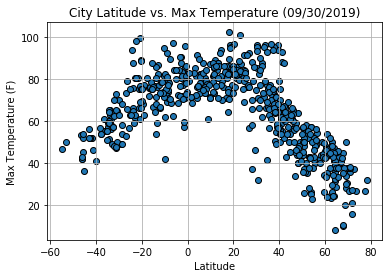

In [13]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

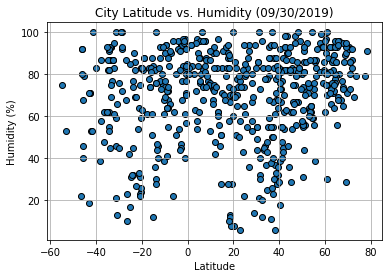

In [14]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

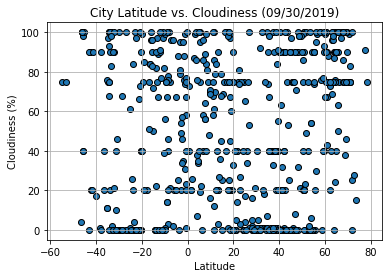

In [15]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

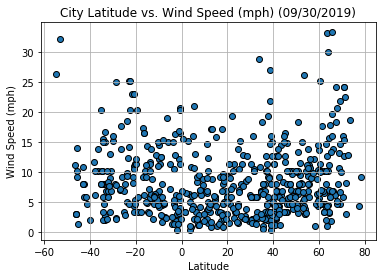

In [16]:
# Build a scatter plot 
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (mph) (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save an image of the chart to view in a folder
plt.savefig("Lat_vs_Wind_Speed.png")

# Show the Figure
plt.show()